In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [11]:
path_file = f'loan_data.csv'

In [12]:
df_loan = pd.read_csv(path_file)

# dicionário de renomeação
rename_columns = {
    'credit.policy': 'leanloan_default', #esta variável é o resultado da classificação de conceção de crédito (=1) ou não conceder crédito (=0). 0 significa default. 
    'purpose': 'finalidade_emprestimo',
    'int.rate': 'taxa_juros',
    'installment': 'parcela_mensal',
    'log.annual.inc': 'log_renda_anual',
    'dti': 'divida_renda',
    'fico': 'escore_fico',
    'days.with.cr.line': 'dias_historico_credito',
    'revol.bal': 'saldo_rotativo',
    'revol.util': 'utilizacao_credito_rotativo',
    'inq.last.6mths': 'consultas_credito_6m',
    'delinq.2yrs': 'atrasos_2_anos',
    'pub.rec': 'registros_publicos_negativos',
    'not.fully.paid': 'default'
}

# renomeando as colunas
df_loan = df_loan.rename(columns=rename_columns)

# dicionário de mapeamento
map_finalidade = {
    'debt_consolidation': 'pagamento de dividas',
    'credit_card': 'cartao de credito',
    'all_other': 'outros',
    'home_improvement': 'reforma residencial',
    'small_business': 'pequeno negocio',
    'major_purchase': 'compra grande valor',
    'educational': 'financiamento estudantil'
}

# aplicando o mapeamento
df_loan['finalidade_emprestimo'] = df_loan['finalidade_emprestimo'].map(map_finalidade)


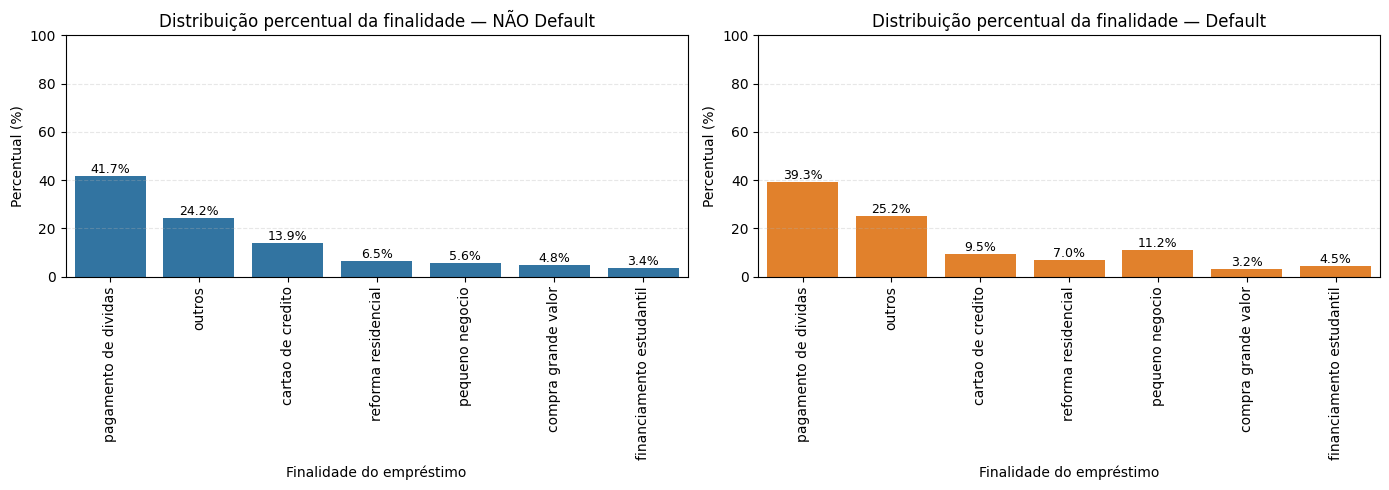

In [13]:
# Ordem das categorias (fixa para comparação)
order_finalidade = df_loan['finalidade_emprestimo'].value_counts().index

# =========================
# Preparação dos dados
# =========================

# NÃO Default
df_nao_default = (
    df_loan[df_loan['default'] == 0]
    .groupby('finalidade_emprestimo')
    .size()
    .reindex(order_finalidade, fill_value=0)
    .reset_index(name='qtd')
)
df_nao_default['percentual'] = df_nao_default['qtd'] / df_nao_default['qtd'].sum() * 100

# Default
df_default = (
    df_loan[df_loan['default'] == 1]
    .groupby('finalidade_emprestimo')
    .size()
    .reindex(order_finalidade, fill_value=0)
    .reset_index(name='qtd')
)
df_default['percentual'] = df_default['qtd'] / df_default['qtd'].sum() * 100

# =========================
# Gráficos
# =========================

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=False)

# -------------------------
# Esquerda — NÃO Default
# -------------------------
sns.barplot(
    data=df_nao_default,
    x='finalidade_emprestimo',
    y='percentual',
    ax=axes[0],
    color=sns.color_palette()[0]  # azul
)

axes[0].set_title('Distribuição percentual da finalidade — NÃO Default')
axes[0].set_xlabel('Finalidade do empréstimo')
axes[0].set_ylabel('Percentual (%)')
axes[0].set_ylim(0, 100)
axes[0].grid(True, axis='y', linestyle='--', alpha=0.3)
axes[0].tick_params(axis='x', rotation=90)

# Valores (%) no topo das barras
for p in axes[0].patches:
    if p.get_height() > 0:
        axes[0].annotate(
            f'{p.get_height():.1f}%',
            (p.get_x() + p.get_width() / 2, p.get_height()),
            ha='center',
            va='bottom',
            fontsize=9
        )

# -------------------------
# Direita — Default
# -------------------------
sns.barplot(
    data=df_default,
    x='finalidade_emprestimo',
    y='percentual',
    ax=axes[1],
    color=sns.color_palette()[1]  # laranja
)

axes[1].set_title('Distribuição percentual da finalidade — Default')
axes[1].set_xlabel('Finalidade do empréstimo')
axes[1].set_ylabel('Percentual (%)')
axes[1].set_ylim(0, 100)
axes[1].grid(True, axis='y', linestyle='--', alpha=0.3)
axes[1].tick_params(axis='x', rotation=90)

# Valores (%) no topo das barras
for p in axes[1].patches:
    if p.get_height() > 0:
        axes[1].annotate(
            f'{p.get_height():.1f}%',
            (p.get_x() + p.get_width() / 2, p.get_height()),
            ha='center',
            va='bottom',
            fontsize=9
        )

plt.tight_layout()
plt.savefig('figuras//distribuicao_finalidade_default.png', dpi=600, bbox_inches='tight')
plt.show()


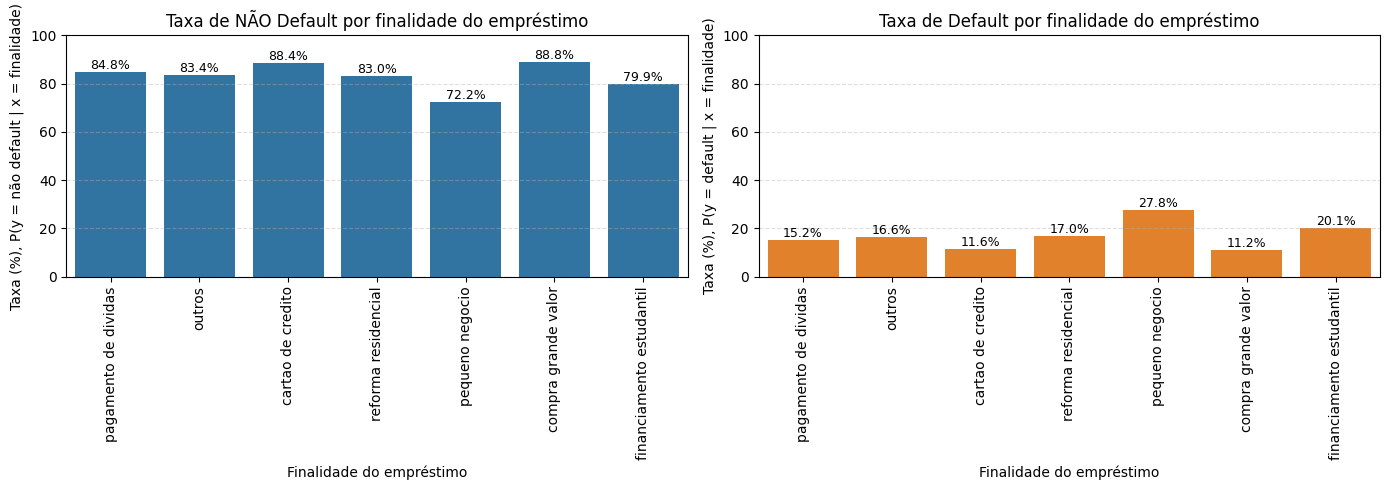

In [14]:
# Ordem das categorias (consistente)
order_finalidade = df_loan['finalidade_emprestimo'].value_counts().index

# =========================
# Cálculo das taxas
# =========================

# Taxa de default por finalidade (%)
taxa_default = (
    df_loan
    .groupby('finalidade_emprestimo')['default']
    .mean()
    .mul(100)
    .reindex(order_finalidade)
    .reset_index(name='taxa_default')
)

# Taxa de não default por finalidade (%)
taxa_nao_default = taxa_default.copy()
taxa_nao_default['taxa_nao_default'] = 100 - taxa_nao_default['taxa_default']

# =========================
# Gráficos
# =========================

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=False)

# -------------------------
# Esquerda — NÃO Default
# -------------------------
sns.barplot(
    data=taxa_nao_default,
    x='finalidade_emprestimo',
    y='taxa_nao_default',
    ax=axes[0],
    color=sns.color_palette()[0]  # azul
)

axes[0].set_title('Taxa de NÃO Default por finalidade do empréstimo')
axes[0].set_xlabel('Finalidade do empréstimo')
axes[0].set_ylabel('Taxa (%), P(y = não default | x = finalidade)')
axes[0].set_ylim(0, 100)
axes[0].grid(True, axis='y', linestyle='--', alpha=0.4)
axes[0].tick_params(axis='x', rotation=90)

# Valores sobre as barras
for p in axes[0].patches:
    axes[0].annotate(
        f'{p.get_height():.1f}%',
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center',
        va='bottom',
        fontsize=9
    )

# -------------------------
# Direita — Default
# -------------------------
sns.barplot(
    data=taxa_default,
    x='finalidade_emprestimo',
    y='taxa_default',
    ax=axes[1],
    color=sns.color_palette()[1]  # laranja
)

axes[1].set_title('Taxa de Default por finalidade do empréstimo')
axes[1].set_xlabel('Finalidade do empréstimo')
axes[1].set_ylabel('Taxa (%), P(y = default | x = finalidade)')
axes[1].set_ylim(0, 100)
axes[1].grid(True, axis='y', linestyle='--', alpha=0.4)
axes[1].tick_params(axis='x', rotation=90)

# Valores sobre as barras
for p in axes[1].patches:
    axes[1].annotate(
        f'{p.get_height():.1f}%',
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.tight_layout()
plt.savefig('figuras//taxa_finalidade_default.png', dpi=600, bbox_inches='tight')
plt.show()


In [15]:
display(taxa_default)

,finalidade_emprestimo,taxa_default
0,pagamento de dividas,15.238817
1,outros,16.602317
2,cartao de credito,11.568938
3,reforma residencial,17.011129
4,pequeno negocio,27.786753
5,compra grande valor,11.212815
6,financiamento estudantil,20.116618
